In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parsasam/captcha-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\willson\.cache\kagglehub\datasets\parsasam\captcha-dataset\versions\1


['111J8', '111XM', '113dk', '113EV', '113sB', '114ty', '115rB', '116gw', '116OC', '119bg', '11AvS', '11AWu']


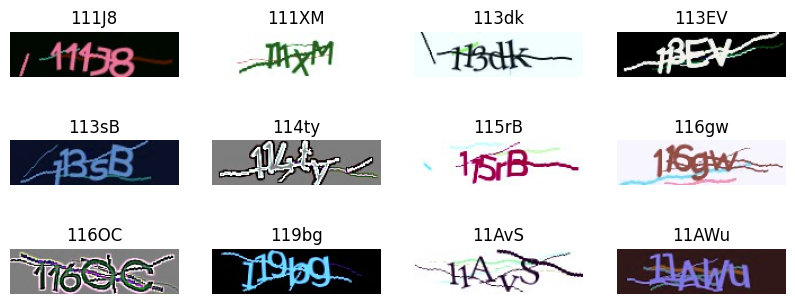

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np


loaded_images = []
image_labels = []


filepaths = [os.path.join(path, filename) for filename in os.listdir(path)]
for i, filename in enumerate(filepaths[:12]):
  loaded_images.append(cv2.imread(filename))
  image_labels.append(os.listdir(path)[i].split('.')[0])

print(image_labels)
fig, axes = plt.subplots(3, 4, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(loaded_images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

['111J8', '111XM', '113dk', '113EV', '113sB', '114ty', '115rB', '116gw', '116OC', '119bg', '11AvS', '11AWu']


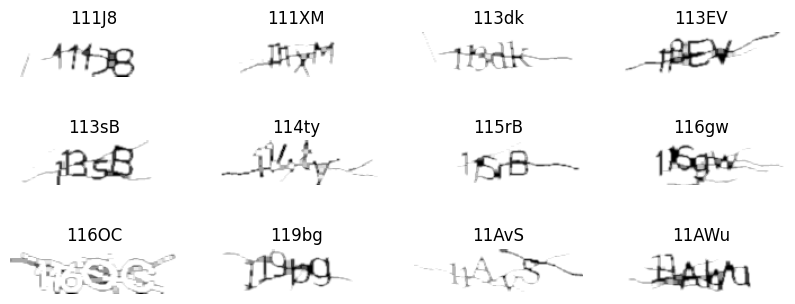

In [71]:
# Process
images = []
for image in loaded_images:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  ret,image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

  # if the background is black, invert it
  if image[0][0] == 0:
    image = cv2.bitwise_not(image)

  # all non-white pixels are now black
  for i, row in enumerate(image):
    for j, pixel in enumerate(row):
      if pixel != 255:
        image[i][j] = 0

  image = cv2.GaussianBlur(image, (3,3), 0)

  image = cv2.dilate(image.copy(), None, 1)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

  images.append(image)


# output and graph
print(image_labels)
fig, axes = plt.subplots(3, 4, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

['111J8', '111XM', '113dk', '113EV', '113sB', '114ty', '115rB', '116gw', '116OC', '119bg', '11AvS', '11AWu']


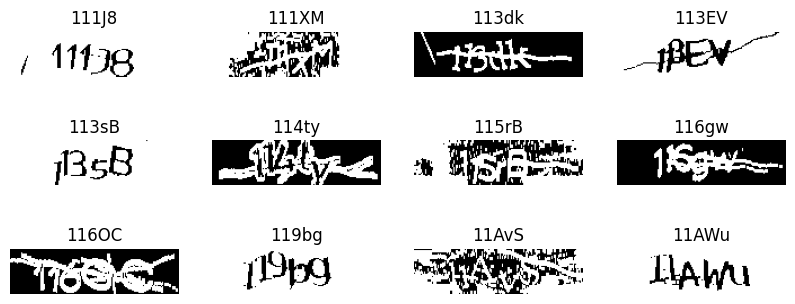

In [72]:
processed_images = []

for i, image in enumerate(loaded_images):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    inv = cv2.bitwise_not(image)
    masked_img = cv2.bitwise_and(image, image, mask=inv)
    masked_img_inv = cv2.bitwise_not(masked_img)
    
    dilation = cv2.dilate(masked_img_inv, np.ones((3, 1), np.uint8))
    
    ret, thresh = cv2.threshold(dilation, 150, 255, cv2.THRESH_BINARY_INV)
    image = cv2.bitwise_not(thresh)
    
    processed_images.append(image)

    

    
# output and graph
print(image_labels)
fig, axes = plt.subplots(3, 4, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
  ax.imshow(processed_images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')